Решающие деревья — это один из наиболее понятных и интерпретируемых методов
машинного обучения. Алгоритм работает, создавая модель в виде дерева, где каждый узел
представляет собой условие, а ветви — результат выполнения этого условия. Таким
образом, решение принимается на основе последовательности логических шагов, что
позволяет легко понять, как модель пришла к своему выводу.
Пример работы решающего дерева:
Представим, что мы разрабатываем систему для оценки кандидатов на работу. У
нас есть несколько факторов, которые могут повлиять на решение о принятии кандидата,
например, образование, опыт работы и результаты собеседования. Система должна
принимать решение о том, стоит ли нанимать кандидата или нет.
Решающему дереву необходимо установить правила для разделения кандидатов на
два класса: тех, кого стоит принять на работу, и тех, кто не подходит. Это делается с
помощью критериев, представленных на каждом уровне дерева.
1. На первом уровне дерево может оценить образование кандидата. Если у кандидата
высшее образование, переходите к следующему условию. Если образование неполное, то
решение может быть принято на этом этапе, например, не принимать кандидата на работу.
2. На следующем уровне дерево может проверить, есть ли у кандидата опыт работы. Если
опыт есть, переходите к следующему условию, если нет — кандидат не проходит.
3. Следующий шаг — это оценка результатов собеседования. Если кандидат хорошо
прошел собеседование, то решение будет "принять на работу", иначе "отказ".
Структура решающего дерева:
- Корень дерева — это первый узел, в котором происходит разделение. Например, "Есть
ли высшее образование?"
- Ветви — это возможные ответы на вопрос из узла. Например, "Да" или "Нет".
- Листья дерева — это конечные решения или результаты. Например, "Принять на работу"
или "Не принять на работу".

Пример 1. Стоит ли принимать кандидата на работу на основе его образования, опыта работы и результатов собеседования

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Данные о кандидатах (образование, опыт, собеседование)
# 0 - нет, 1 - да
# X - признаки (образование, опыт, собеседование)
# y - целевая переменная (0 - не принять, 1 - принять)
X = np.array([[1, 1, 1], # Высшее, опыт, прошел собеседование
[0, 0, 0], # Нет образования, нет опыта, не прошел собеседование
[1, 0, 1], # Высшее, нет опыта, прошел собеседование
[1, 1, 0], # Высшее, опыт, не прошел собеседование
[0, 1, 1]]) # Нет образования, опыт, прошел собеседование

In [3]:
y = np.array([1, 0, 1, 0, 1]) # 1 - принять, 0 - не принять

In [4]:
# Создаем модель решающего дерева
model = DecisionTreeClassifier()

In [5]:
# Обучаем модель
model.fit(X, y)

DecisionTreeClassifier()

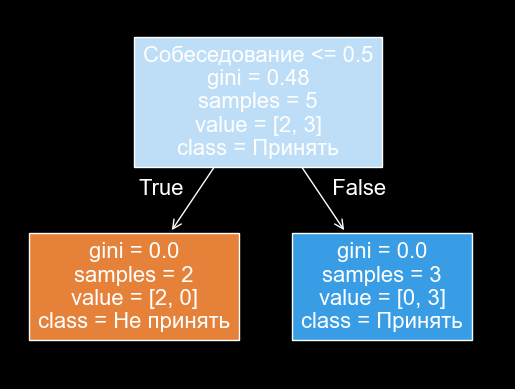

In [6]:
# Печатаем структуру дерева
tree.plot_tree(model, filled=True, feature_names=["Образование", "Опыт", "Собеседование"],
class_names=["Не принять", "Принять"])
plt.show()

In [7]:
# Пример предсказания: кандидат с высшим образованием, без опыта и прошедший собеседование
prediction = model.predict([[1, 0, 1]])
print(f"Предсказание для кандидата: {'Принять на работу' if prediction[0] == 1 else 'Не принять на работу'}")

Предсказание для кандидата: Принять на работу


Пример 2.  Предположим, нам нужно решить, пойдет ли человек гулять:
1. На улице дождь?
- Да → Остается дома.
- Нет → Переходим к следующему вопросу.
2. Температура выше 15°C?
- Да → Идет гулять.
- Нет → Сидит дома.
Такое дерево помогает автоматизировать простые решения.
Сильные стороны:
- Понятность (можно "прочитать" логику модели).
- Быстрое принятие решений.
Недостатки:
- Склонно к переобучению (слишком точно "запоминает" данные и теряет гибкость).
- Не всегда хорошо работает с шумными данными.
Случайный лес: команда умных деревьев
Если дерево решений — это один эксперт, то случайный лес — группа экспертов,
которые голосуют за результат.
Как это работает:
1. Создаем много разных деревьев решений.
2. Каждое дерево обучается на случайной части данных и использует случайные признаки.
3. Когда нужно принять решение, все деревья "голосуют", и выбирается наиболее
популярный ответ.
Пример: Допустим, мы хотим предсказать, понравится ли человеку новый фильм.
- Первое дерево оценивает жанр фильма.
- Второе — учитывает возраст зрителя.
- Третье — смотрит на популярность фильма.
Каждое дерево выдает свой вердикт, а финальное решение принимается на основе
большинства голосов.
Сильные стороны:
- Высокая точность (меньше шансов ошибиться).
- Устойчивость к переобучению (мнение толпы обычно точнее, чем мнение одного
эксперта).
Недостатки:
- Сложнее интерпретировать (трудно понять, почему лес принял то или иное решение).
- Более ресурсоемкий (нужно больше памяти и времени на обучение).
Когда использовать?
- Дерево решений — когда важна простота и интерпретируемость (например, в медицине для объяснения диагноза пациенту).
- Случайный лес — когда нужна точность и стабильность (например, для предсказания биржевых цен или кредитного скоринга).

Пример 2. Предскажем, купит ли клиент товар, основываясь на возрасте и доходе.

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
# Данные
data = {
'Возраст': [25, 30, 35, 40, 45, 50, 55],
'Доход': [50000, 60000, 65000, 70000, 80000, 90000, 85000],
'Купил': ['Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет']
}

In [10]:
# Создаем DataFrame
df = pd.DataFrame(data)

In [11]:
# Подготовка данных
X = df[['Возраст', 'Доход']] # признаки
y = df['Купил'].map({'Нет': 0, 'Да': 1}) # метки (0 = Нет, 1 = Да)

In [12]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# 1. Дерево решений
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
print(f' Точность дерева решений: {tree_acc * 100:.2f}%')

 Точность дерева решений: 0.00%


In [14]:
# 2. Случайный лес
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)
print(f' Точность случайного леса: {forest_acc * 100:.2f}%')

 Точность случайного леса: 33.33%


In [15]:
# Прогноз для нового клиента
new_client = pd.DataFrame({'Возраст': [38], 'Доход': [72000]})
tree_decision = tree_model.predict(new_client)
forest_decision = forest_model.predict(new_client)
print(f" Дерево решений: {'Купит' if tree_decision[0] == 1 else 'Не купит'}")
print(f" Случайный лес: {'Купит' if forest_decision[0] == 1 else 'Не купит'}")

 Дерево решений: Купит
 Случайный лес: Купит


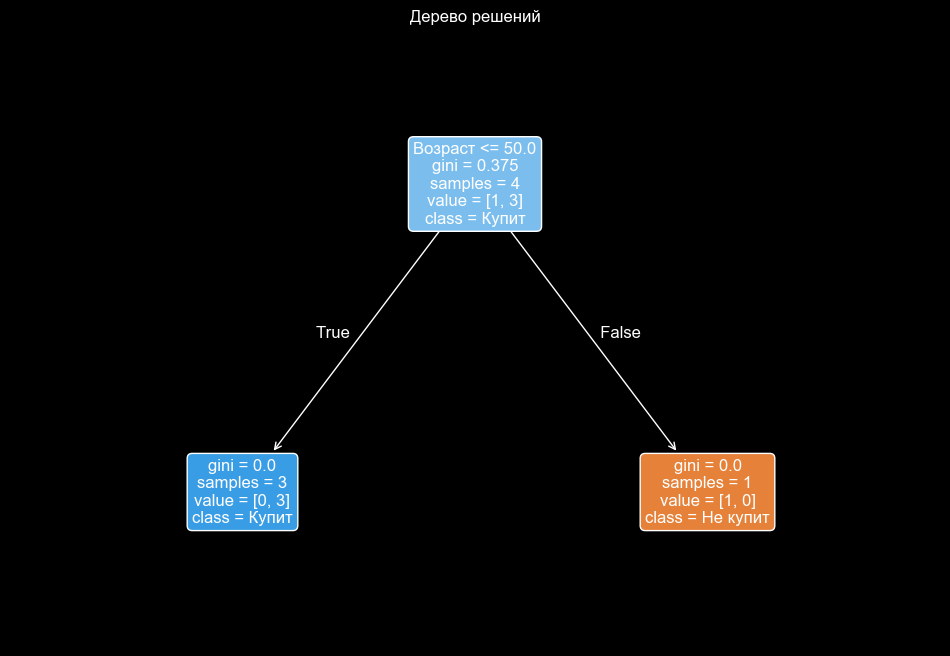

In [16]:
# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=['Возраст', 'Доход'], class_names=['Не купит',
'Купит'], rounded=True, fontsize=12)
plt.title("Дерево решений")
plt.show()